### Figure S17 of *Grund & Ritter (2020)* , GJI


This Jupyter Notebook allows to reproduce the "raw map" shown in **Fig. S17** (Supporting Information) of our GJI paper:

> _**Grund, M. & Ritter, J. R. R. (2020)**_, Shear-wave splitting beneath Fennoscandia — evidence for dipping structures and laterally varying multilayer anisotropy, *Geophysical Journal International*, https://doi.org/10.1093/gji/ggaa388.

Afterwards some modifications were made to the plot using Inkscape. 

**Note**: since this notebook is a translation from a GMT shell script some parts may slightly differ from the figure shown in the paper.

Feel free to modify or play around with the different parameters!

**PyGMT and GMT requirements history:**
* 2020-07-23 (original version): PyGMT [0.1.0](https://www.pygmt.org/v0.1.0/index.html) & GMT >= [6.0.0](https://docs.generic-mapping-tools.org/6.0/)
* 2021-08-08 PyGMT [0.4.0](https://www.pygmt.org/v0.4.0/index.html) & GMT >= [6.2.0](https://docs.generic-mapping-tools.org/6.2/)
* 2025-08-26 (last modified): PyGMT [0.16.0](https://www.pygmt.org/v0.16.0/index.html) & GMT >= [6.4.0](https://docs.generic-mapping-tools.org/6.4/)

**Additional required packages:**
* pandas

**Author**: 
* Michael Grund ([@michaelgrund](https://github.com/michaelgrund))

In [11]:
import pygmt
import pandas as pd

In [12]:
# create figure object
fig = pygmt.Figure() 

In [13]:
# define parameters for plotting
pygmt.config(FONT_ANNOT_PRIMARY = '2p,Helvetica',
            FONT_LABEL = '4',
            MAP_LABEL_OFFSET = '2.5p',
            MAP_TICK_LENGTH_PRIMARY = '1p',
            PS_MEDIA ='A2',
            PROJ_LENGTH_UNIT = 'c',
            MAP_ANNOT_OFFSET_PRIMARY = '0.7p',
            MAP_ANNOT_OFFSET_SECONDARY = '1p',
            MAP_FRAME_TYPE = 'plain',
            MAP_FRAME_WIDTH = '0.2p',
            FORMAT_GEO_MAP = 'D',
            PS_CHAR_ENCODING = 'Standard+',
            MAP_FRAME_PEN = '0.2p,black',
            MAP_TICK_PEN_PRIMARY = '0.2p,black')  

In [14]:
# define region
lonlow = 5
lonupp = 15
latlow = 61
latupp = 66

regvals = [5, 15, 61, 66]
cmapo = 'topo.cpt'

# generate background image based on grid
fig.grdimage('@earth_relief_01m', 
             region = regvals, 
             projection = 'm1:55000000', 
             cmap = cmapo)

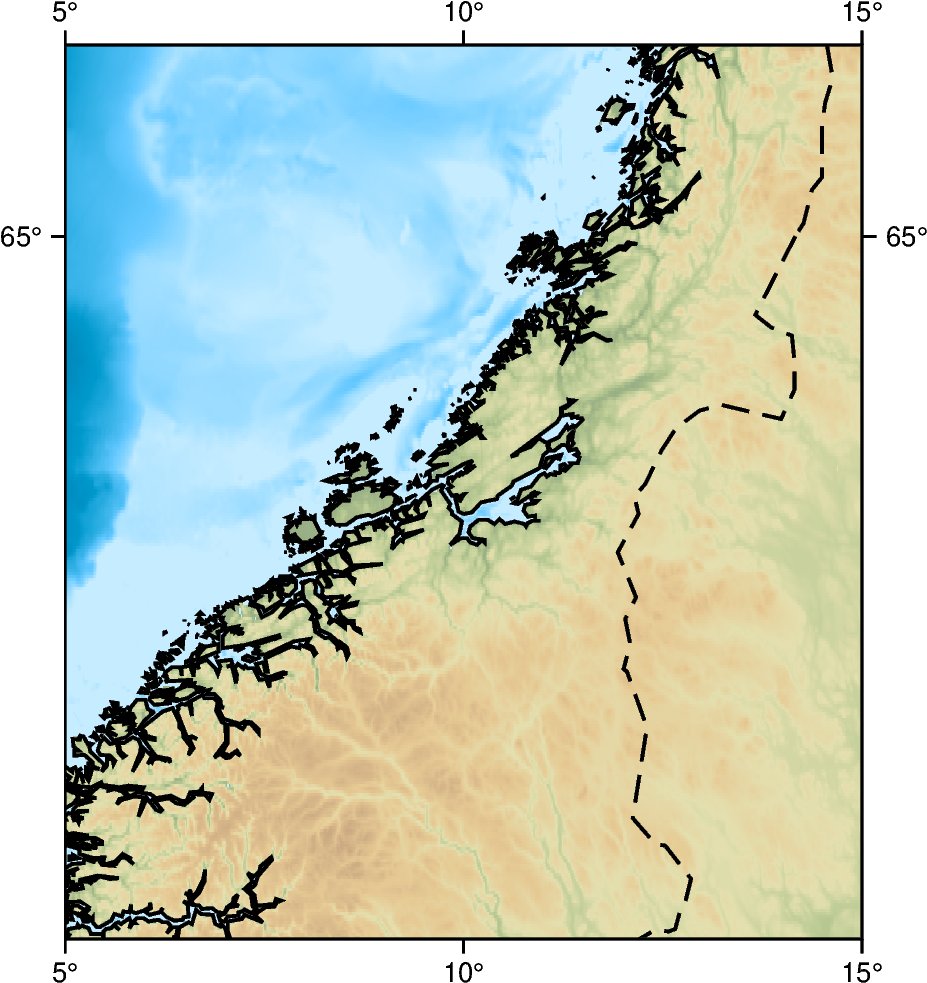

In [15]:
# plot shorelines, borders with an immediate resolution and add a frame.
fig.coast(resolution = 'i', 
          shorelines ='1/thinnest,black', 
          frame = ['x5', 'y5', 'NSEW'],
          borders = '1/0.25p,-')

figdpi = 1000
fig.show(dpi = figdpi)

In [16]:
# read file with station data using pandas
filein = '00_ordfile_stereos.dat'
namescol = ['id','staname','lon', 'lat', 'filename', 'val1','val2','val3']
datatab = pd.read_table(filein, sep=r"\s+", names = namescol)
datatab.head()

,id,staname,lon,lat,filename,val1,val2,val3
0,1,AAL,19.9936,60.1780,001_PLOT_RESULTS_stereo_AAL.eps,9,35,0
1,2,AKN,6.9974,62.1783,002_PLOT_RESULTS_stereo_AKN.eps,1,20,0
2,3,ARA0,25.5058,69.5349,003_PLOT_RESULTS_stereo_ARA0.eps,8,19,0
3,4,ARBE,25.9841,59.4365,004_PLOT_RESULTS_stereo_ARBE.eps,2,4,0
4,5,ARE0,25.5057,69.5349,005_PLOT_RESULTS_stereo_ARE0.eps,28,61,0


In [17]:
# filter stations (use only locations within regions limits defined above)
datatab = datatab[(datatab['lon'] >= lonlow) & (datatab['lon'] <= lonupp) & (datatab['lat'] >= latlow)
                  & (datatab['lat'] <= latupp)]

# reset the index
datatab = datatab.reset_index()

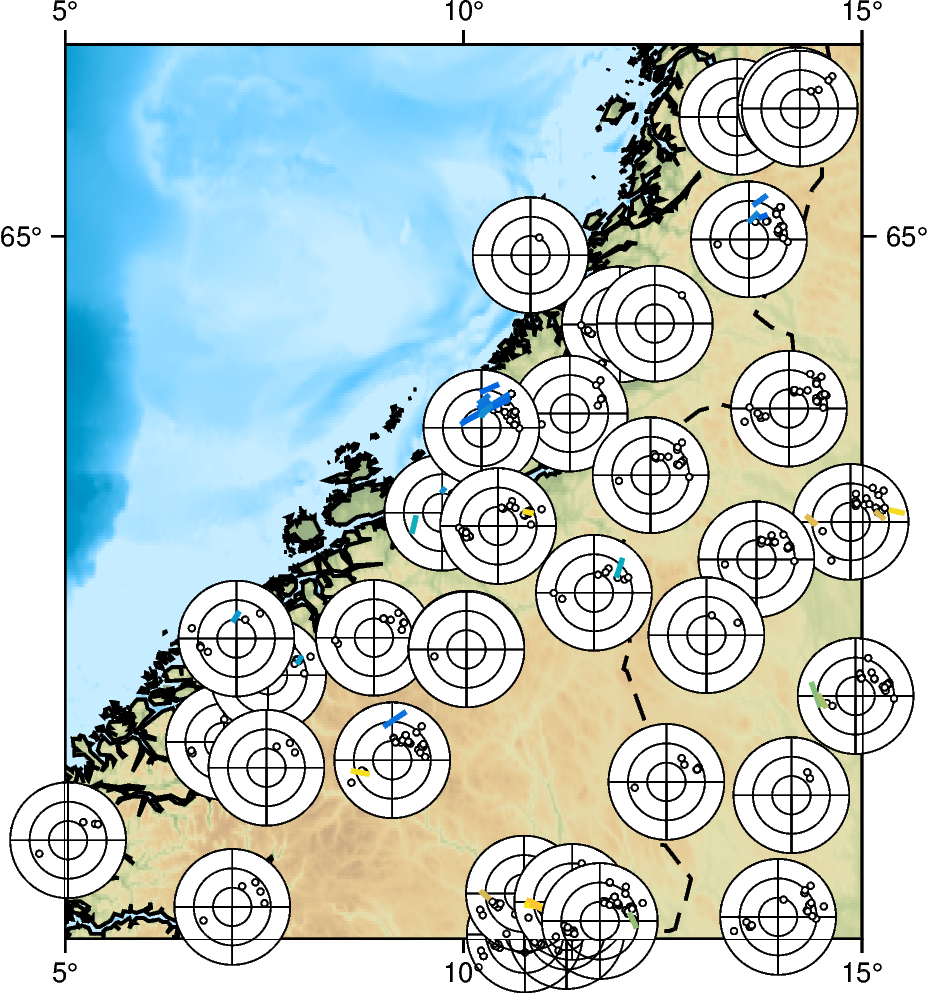

In [18]:
# insert the stereoplots available from eps files using the image function of PyGMT
sizeim = '0.12i'
diaCIRC = '0.115i'
diaSTAMARKER = '1.5p'

for i in range(0,len(datatab)):
    lon_im = datatab.lon[i]
    lat_im = datatab.lat[i]
    filen = datatab.filename[i]
    
    lonCIRC = datatab.lon[i]
    latCIRC = datatab.lat[i]

    fig.plot(x = lonCIRC, 
             y = latCIRC,
             style = 'c' + diaCIRC,
             fill = 'white')
    
    fig.image('stereoplots_eps/' + filen, position = 'g' + str(lon_im) + '/' + str(lat_im) + '+w' + sizeim + '+jCM')

fig.show(dpi = figdpi)

In [20]:
# finally save figure
fig.savefig('PLOT_figs17.png', dpi = 1000)